In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)


In [7]:

print("Shape:", df.shape)

print("Data Types:\n", df.dtypes)

print("\nInfo:")
df.info()

print("\nDescribe:")
print(df.describe(include='all'))


Shape: (57394, 49)
Data Types:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
we

In [9]:

print("Unique locations:", df['location'].nunique())

print("Continent frequency:\n", df['continent'].value_counts())

print("Max Total Cases:", df['total_cases'].max())
print("Mean Total Cases:", df['total_cases'].mean())

print("Quartiles for total_deaths:\n", df['total_deaths'].quantile([0.25, 0.50, 0.75]))

print(df.loc[df['human_development_index'].idxmax(), ['continent', 'human_development_index']])

print(df.loc[df['gdp_per_capita'].idxmin(), ['continent', 'gdp_per_capita']])


Unique locations: 216
Continent frequency:
 continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64
Max Total Cases: 55154651.0
Mean Total Cases: 167797.3688753302
Quartiles for total_deaths:
 0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64
continent                  Europe
human_development_index     0.953
Name: 38632, dtype: object
continent         Africa
gdp_per_capita    661.24
Name: 10259, dtype: object


In [11]:
df = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]


In [13]:
# a. Remove duplicates
df.drop_duplicates(inplace=True)

# b. Check missing values
print("Missing values:\n", df.isnull().sum())

# c. Drop rows where continent is missing
df.dropna(subset=['continent'], inplace=True)

# d. Fill remaining missing values with 0
df.fillna(0, inplace=True)


Missing values:
 continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [17]:

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


df['month'] = df['date'].dt.month


In [19]:

df_groupby = df.groupby('continent').max().reset_index()


In [21]:

df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']


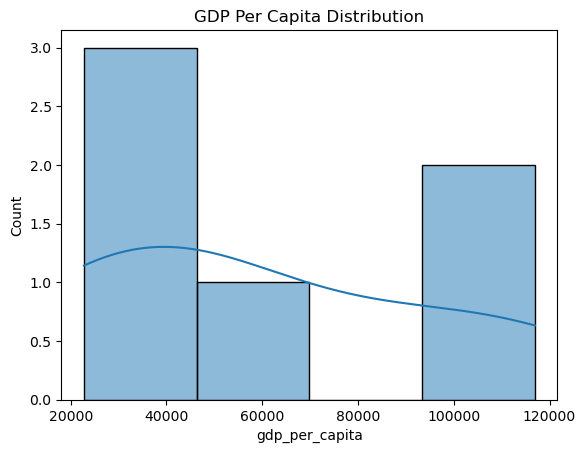

In [23]:
sns.histplot(df_groupby['gdp_per_capita'], kde=True)
plt.title('GDP Per Capita Distribution')
plt.show()


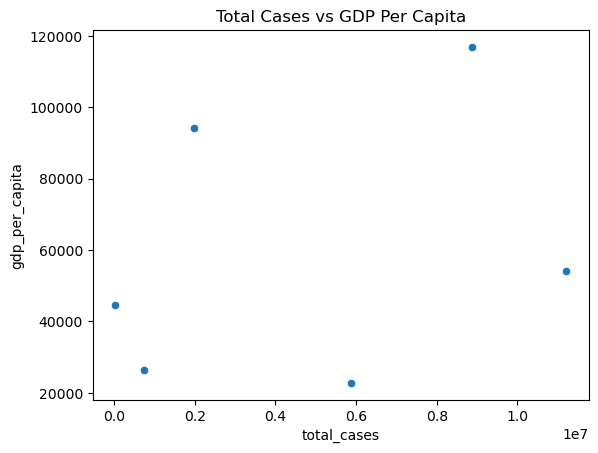

In [25]:
sns.scatterplot(data=df_groupby, x='total_cases', y='gdp_per_capita')
plt.title('Total Cases vs GDP Per Capita')
plt.show()



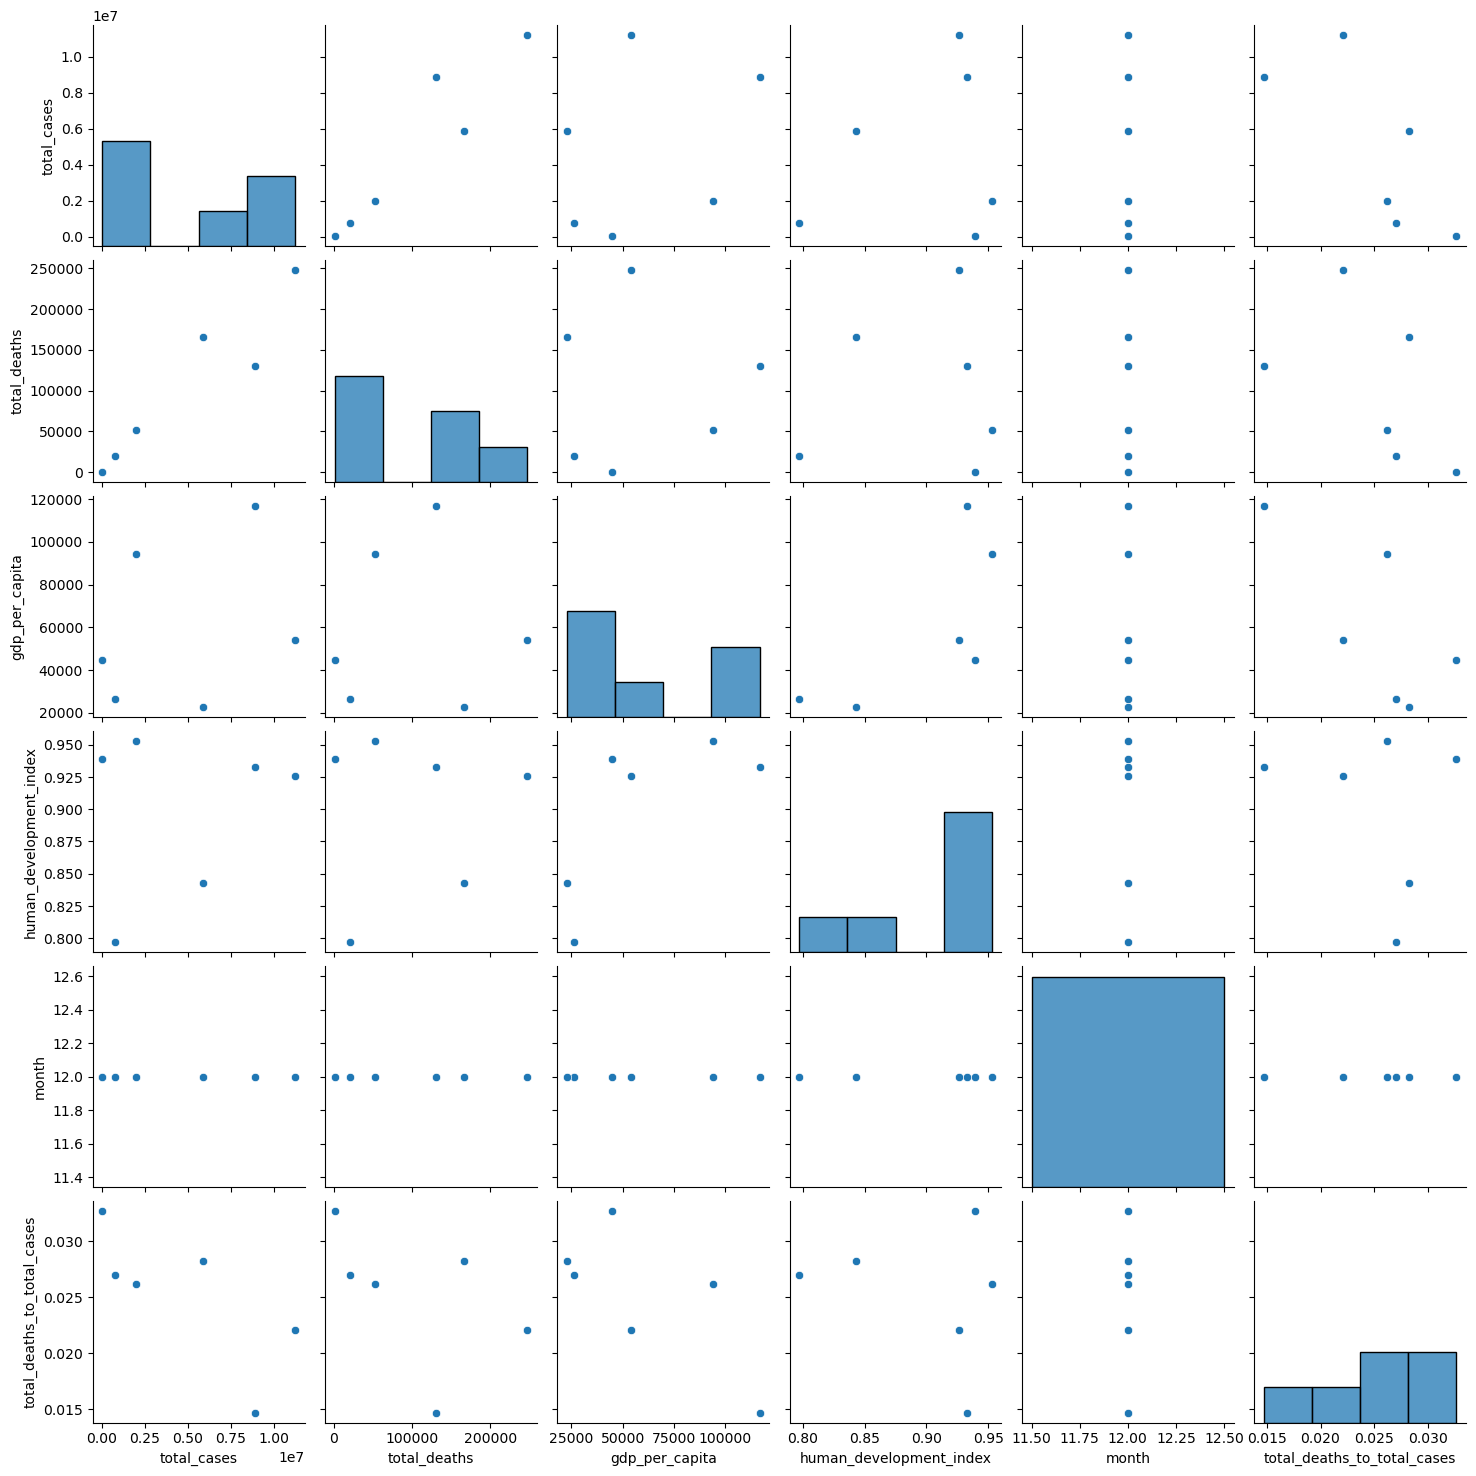

In [27]:
sns.pairplot(df_groupby)
plt.show()


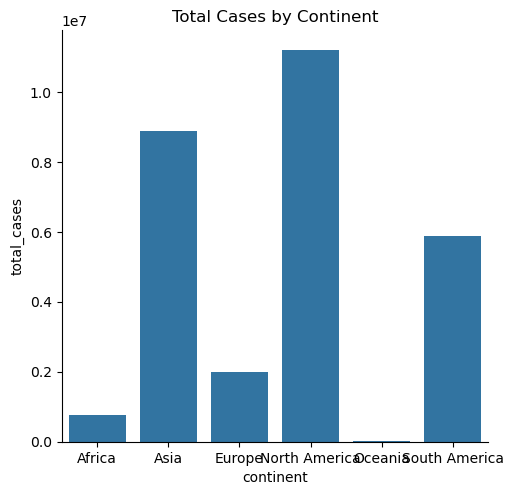

In [29]:
sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar')
plt.title('Total Cases by Continent')
plt.show()


In [31]:
df_groupby.to_csv('df_groupby_covid_analysis.csv', index=False)
